In [1]:
data<-read.csv("StudentsPerformance.csv")
head(data)

gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75
female,group B,associate's degree,standard,none,71,83,78


In [2]:
paste("No. of rows in the dataframe: ", nrow(data))
paste("No. of columns in the dataframe: ", ncol(data))

[1] "No. of rows in the dataframe:  1000"

[1] "No. of columns in the dataframe:  8"

In [3]:
str(data)

'data.frame':	1000 obs. of  8 variables:
 $ gender                     : Factor w/ 2 levels "female","male": 1 1 1 2 2 1 1 2 2 1 ...
 $ race.ethnicity             : Factor w/ 5 levels "group A","group B",..: 2 3 2 1 3 2 2 2 4 2 ...
 $ parental.level.of.education: Factor w/ 6 levels "associate's degree",..: 2 5 4 1 5 1 5 5 3 3 ...
 $ lunch                      : Factor w/ 2 levels "free/reduced",..: 2 2 2 1 2 2 2 1 1 1 ...
 $ test.preparation.course    : Factor w/ 2 levels "completed","none": 2 1 2 2 2 2 1 2 1 2 ...
 $ math.score                 : int  72 69 90 47 76 71 88 40 64 38 ...
 $ reading.score              : int  72 90 95 57 78 83 95 43 64 60 ...
 $ writing.score              : int  74 88 93 44 75 78 92 39 67 50 ...


In [4]:
colSums(is.na(data))

gender              race.ethnicity 
                          0                           0 
parental.level.of.education                       lunch 
                          0                           0 
    test.preparation.course                  math.score 
                          0                           0 
              reading.score               writing.score 
                          0                           0

In [5]:
#UNIVARIATE ANALYSIS STARTS FROM HERE

In [6]:
summary(data)

    gender    race.ethnicity     parental.level.of.education          lunch    
 female:518   group A: 89    associate's degree:222          free/reduced:355  
 male  :482   group B:190    bachelor's degree :118          standard    :645  
              group C:319    high school       :196                            
              group D:262    master's degree   : 59                            
              group E:140    some college      :226                            
                             some high school  :179                            
 test.preparation.course   math.score     reading.score    writing.score   
 completed:358           Min.   :  0.00   Min.   : 17.00   Min.   : 10.00  
 none     :642           1st Qu.: 57.00   1st Qu.: 59.00   1st Qu.: 57.75  
                         Median : 66.00   Median : 70.00   Median : 69.00  
                         Mean   : 66.09   Mean   : 69.17   Mean   : 68.05  
                         3rd Qu.: 77.00   3rd Qu.: 79.00   3

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

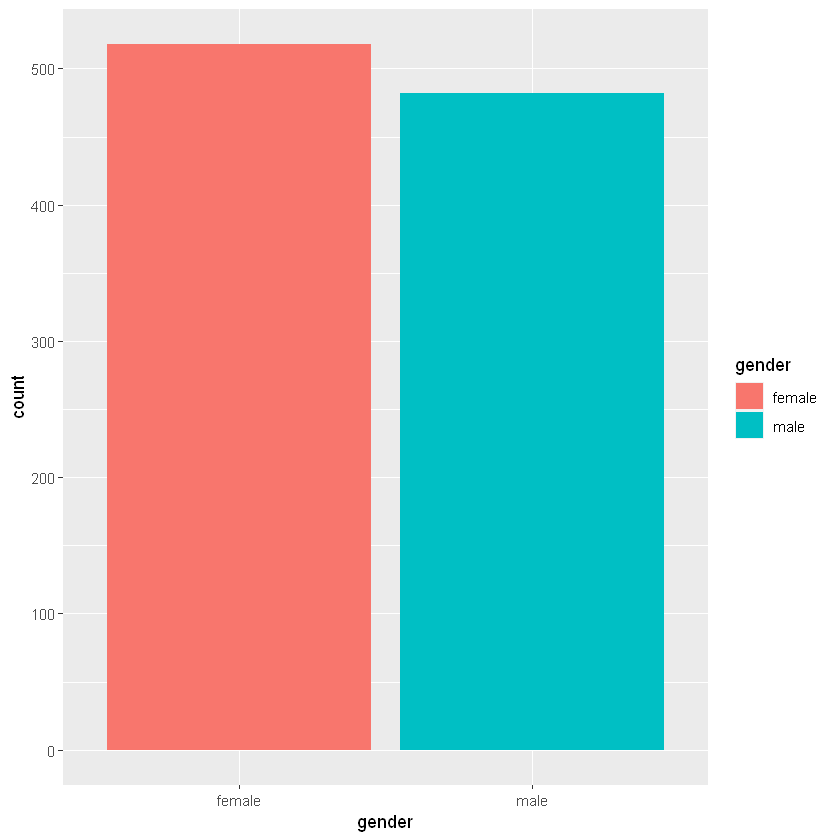

In [7]:
library(ggplot2)
ggplot(data,aes(gender))+geom_bar(aes(fill= gender))

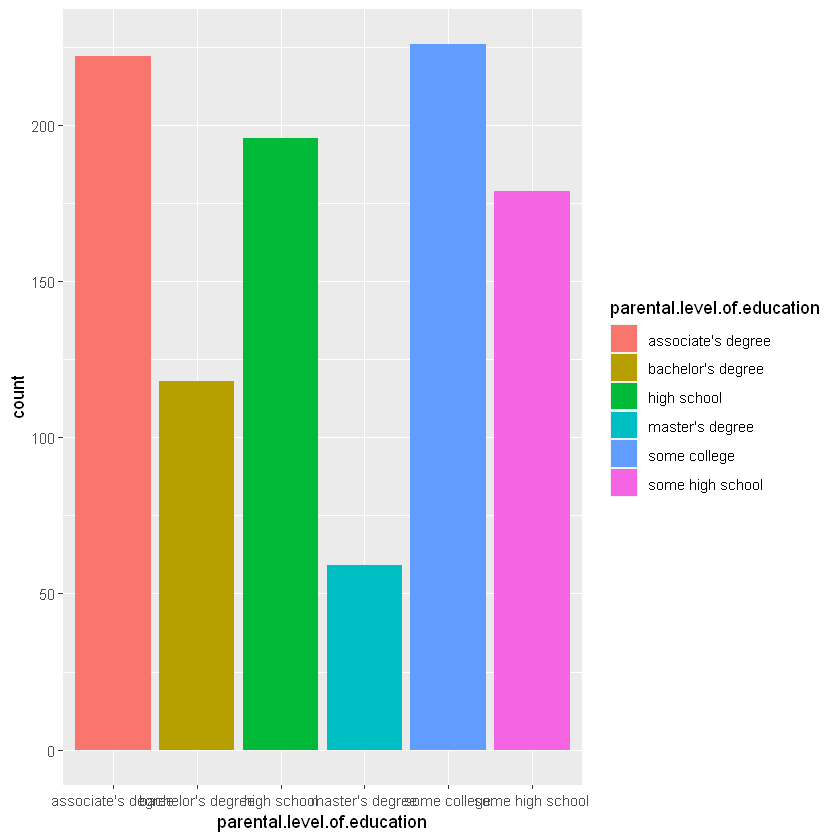

In [8]:

ggplot(data,aes( parental.level.of.education))+geom_bar(aes(fill= parental.level.of.education))

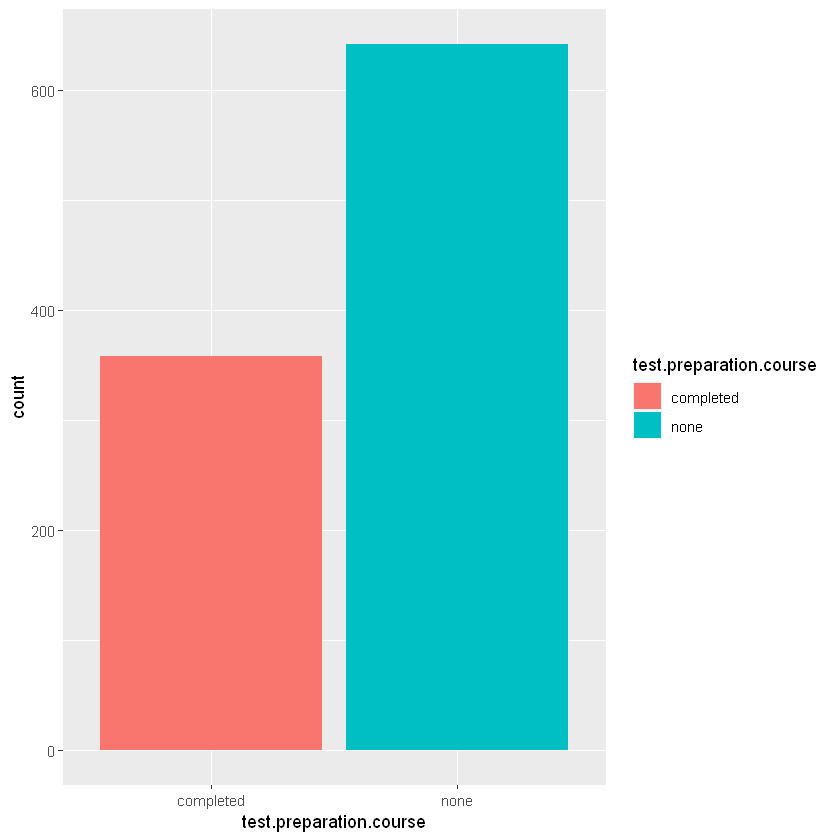

In [9]:
ggplot(data,aes( test.preparation.course
))+geom_bar(aes(fill= test.preparation.course
))

In [10]:
#BI-VARIEATE

In [11]:
library(dplyr)

data %>%
group_by(race.ethnicity) %>%
summarize(avg_maths = mean(math.score), avg_reading = mean(reading.score), avg_writing = mean(writing.score))

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



race.ethnicity,avg_maths,avg_reading,avg_writing
group A,61.62921,64.67416,62.67416
group B,63.45263,67.35263,65.60000
group C,64.46395,69.10345,67.82759
group D,67.36260,70.03053,70.14504
group E,73.82143,73.02857,71.40714


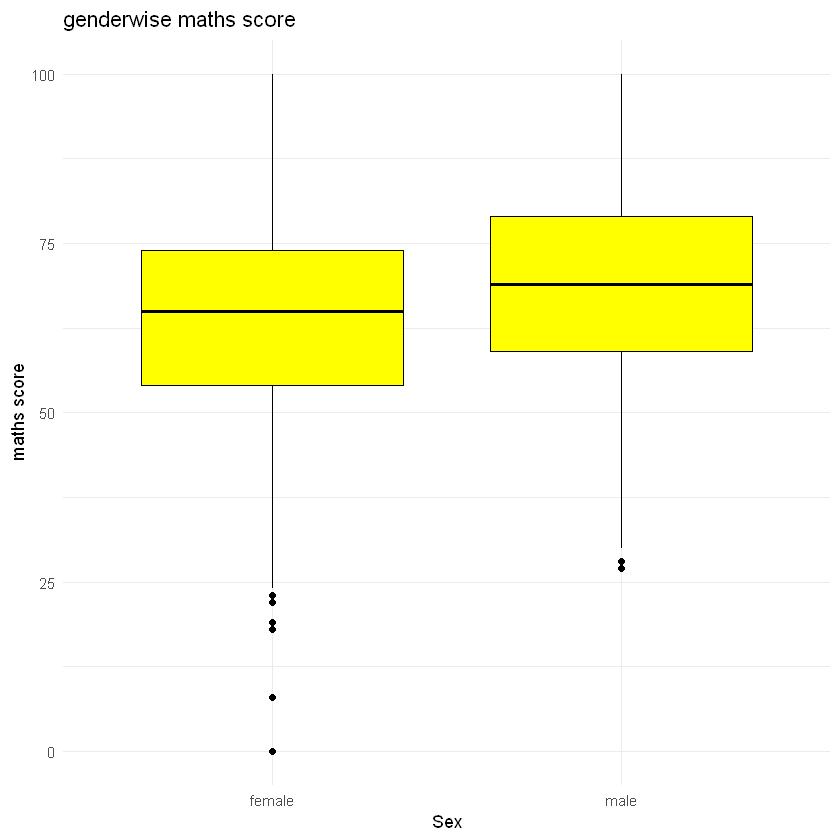

In [12]:
data %>%
 ggplot(aes(gender, math.score)) +
 geom_boxplot(fill = "yellow", colour = "black") +
 labs(title = "genderwise maths score", x = "Sex", y = "maths score") +
 theme_minimal() 

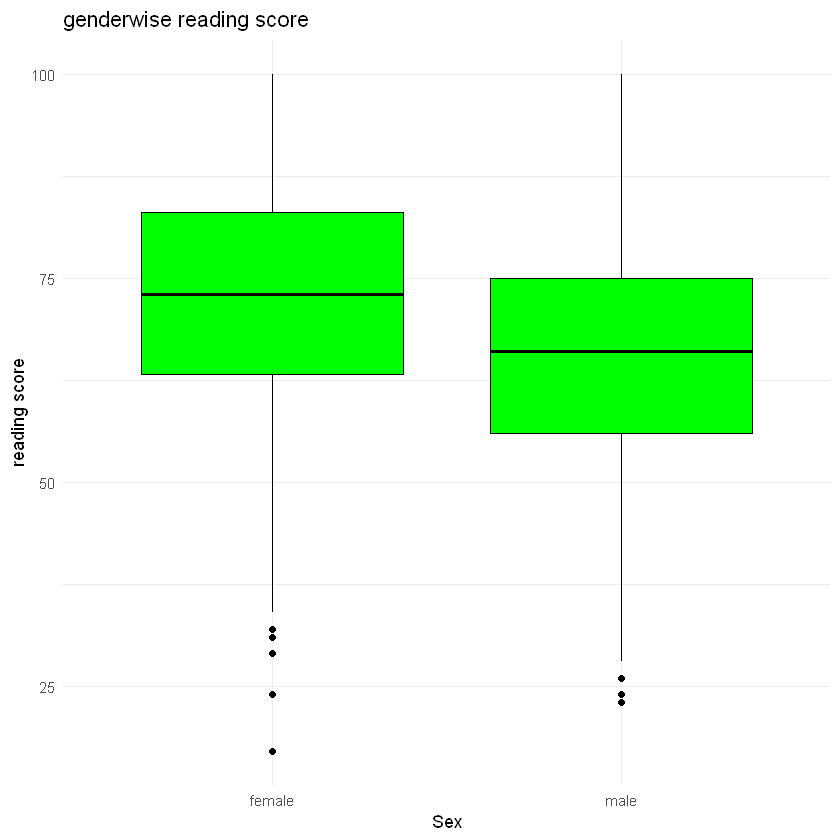

In [13]:
data %>%
 ggplot(aes(gender, reading.score)) +
 geom_boxplot(fill = "green", colour = "black") +
 labs(title = "genderwise reading score", x = "Sex", y = "reading score") +
 theme_minimal()

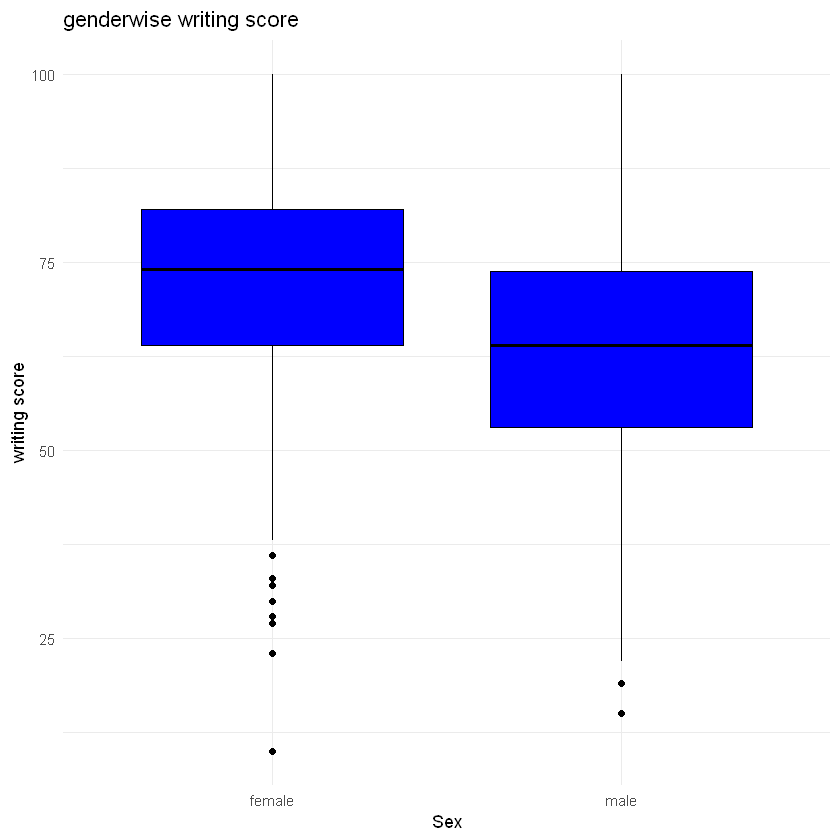

In [14]:
data %>%
 ggplot(aes(gender, writing.score)) +
 geom_boxplot(fill = "blue", colour = "black") +
 labs(title = "genderwise writing score", x = "Sex", y = "writing score") +
 theme_minimal()

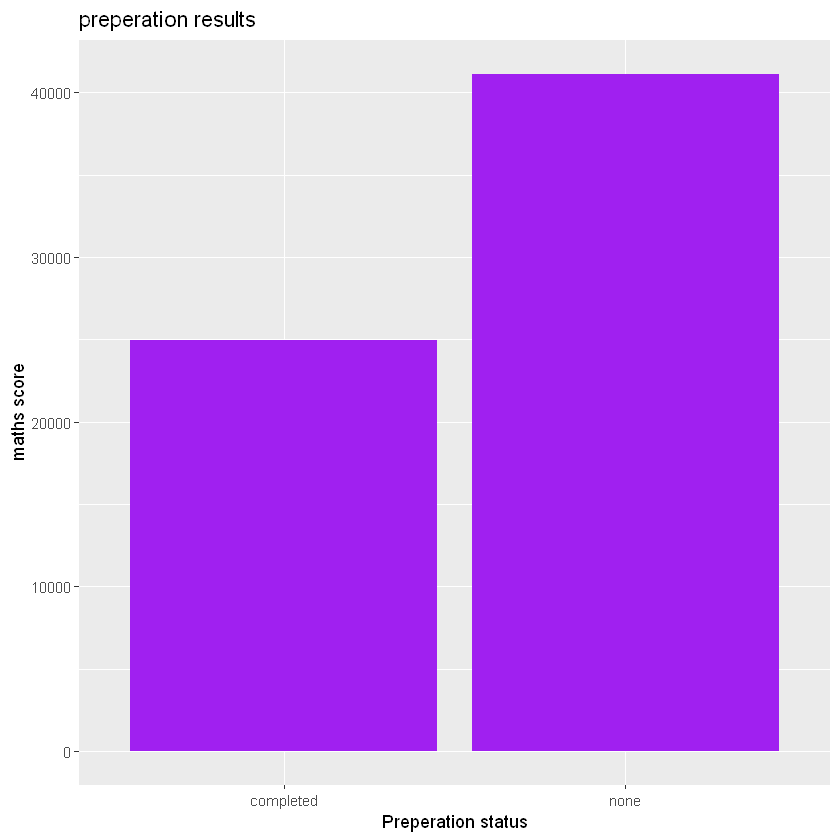

In [15]:
data %>%
 ggplot(aes(x = test.preparation.course, y = math.score)) +
 geom_bar(stat = "identity", fill = "purple") +
 labs(x = "Preperation status", y = "maths score", title = "preperation results")


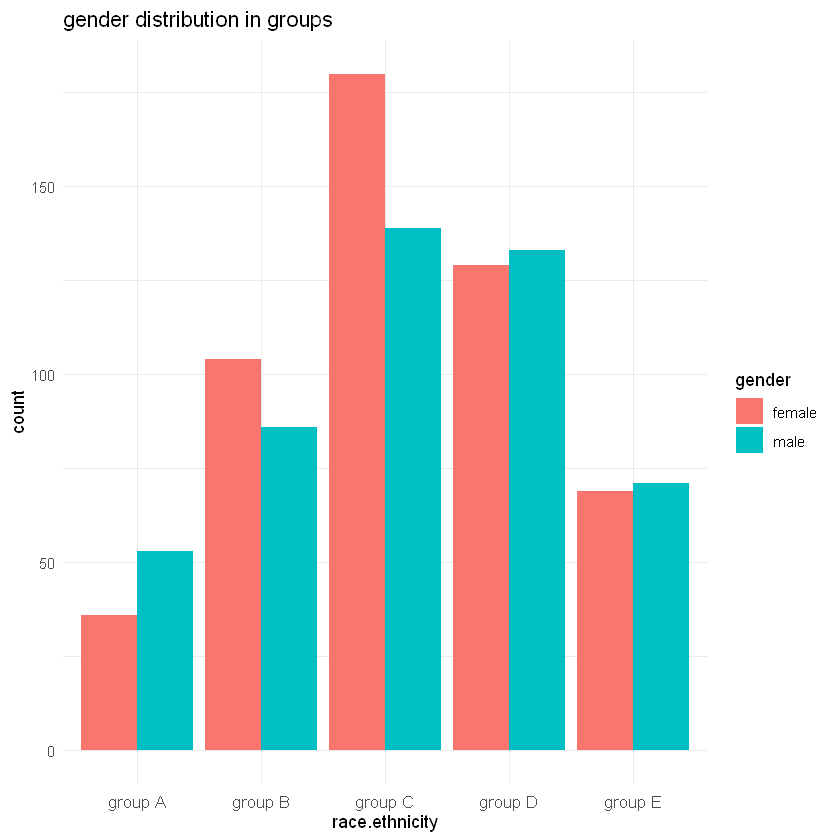

In [16]:
data %>%
 ggplot(aes(race.ethnicity )) +
 geom_bar(aes(fill = gender ), position = position_dodge()) +
 labs(title = "gender distribution in groups") +
 theme_minimal() +
 theme(axis.text.x = element_text(size = 10, vjust = 0.5))

In [17]:
data %>%
group_by(race.ethnicity, gender) %>%
summarize(avg_maths = mean(math.score), avg_reading = mean(reading.score), 
          avg_writing = mean(writing.score))

`summarise()` has grouped output by 'race.ethnicity'. You can override using the `.groups` argument.


race.ethnicity,gender,avg_maths,avg_reading,avg_writing
group A,female,58.52778,69.00000,67.86111
group A,male,63.73585,61.73585,59.15094
group B,female,61.40385,71.07692,70.04808
group B,male,65.93023,62.84884,60.22093
group C,female,62.03333,71.94444,71.77778
group C,male,67.61151,65.42446,62.71223
group D,female,65.24806,74.04651,75.02326
group D,male,69.41353,66.13534,65.41353
group E,female,70.81159,75.84058,75.53623
group E,male,76.74648,70.29577,67.39437


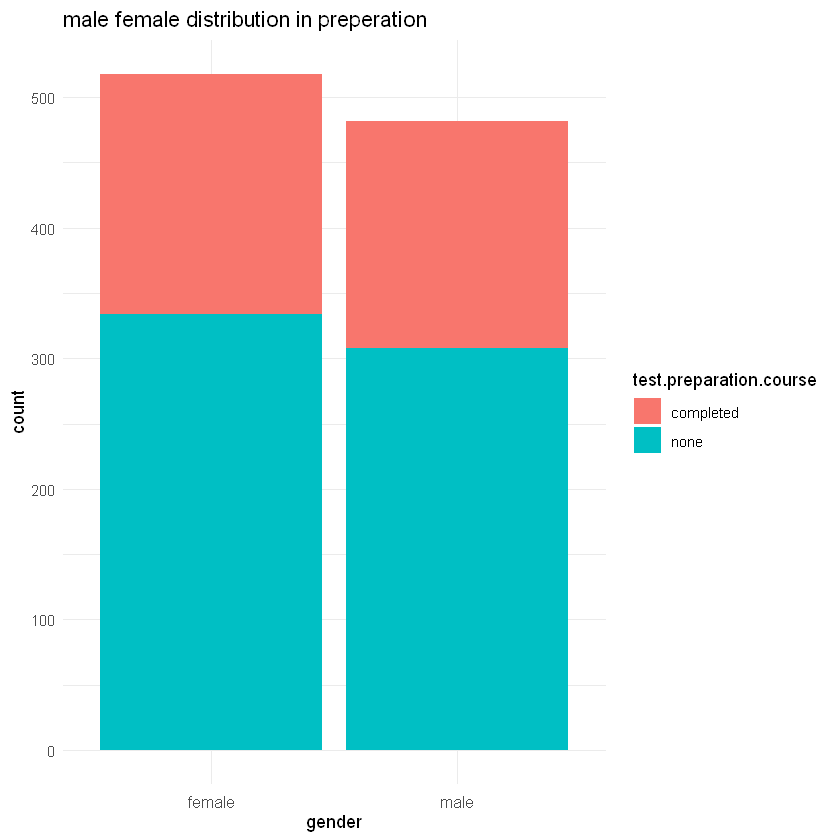

In [18]:
data %>%
 ggplot(aes(gender)) +
 geom_bar(aes(fill = test.preparation.course)) +
 labs(title = "male female distribution in preperation") +
 theme_minimal() +
 theme(axis.text.x = element_text( size = 10, vjust = 0.5))

In [19]:
#Inferences
"""
Bad grouping
Males are better in maths nd females are better in reading & writing
educated people dont send their wards to this school
Students are not very sincere
"""


ERROR: Error in parse(text = x, srcfile = src): <text>:2:3: unexpected string constant
6: Students are not very sincere
7: "
     ^
